## Linear Regression

### Library Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.utils.fixes import loguniform
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]

### Using Quantitative Predictors with Boston Data
This example comes from *ISLR* in their Chapter 3 Lab. 
The Boston Data contains information on census tracts in Boston. Our goal is to predict `medv`, the median house value, using a variety of quantitative predictors and one dummy-coded indicator variable, `chas`, that indicates whether a tract bounds the Charles River.

In [2]:
data_df = pd.read_csv("https://raw.githubusercontent.com/LukeMoraglia/ISLR_datasets/master/data/Boston.csv")

In [3]:
data_df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

In [4]:
data_df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.105710    8.707259  168.537116    2.164946    7.141062   
min      2.900000    1.129600    1.000000  187.000000   12.600000    1.730000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000    6.950000   
50%     77.500000    3.207450    5.000000  330.000000   19.050000   11.360000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000   16.955000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

             medv  
count  506.000000  
mean    22.532806  
std      9.197104  
min      5.000000  
25%     17.025000  
50%     21.200000  
75%     25.000000  
max     50.000000

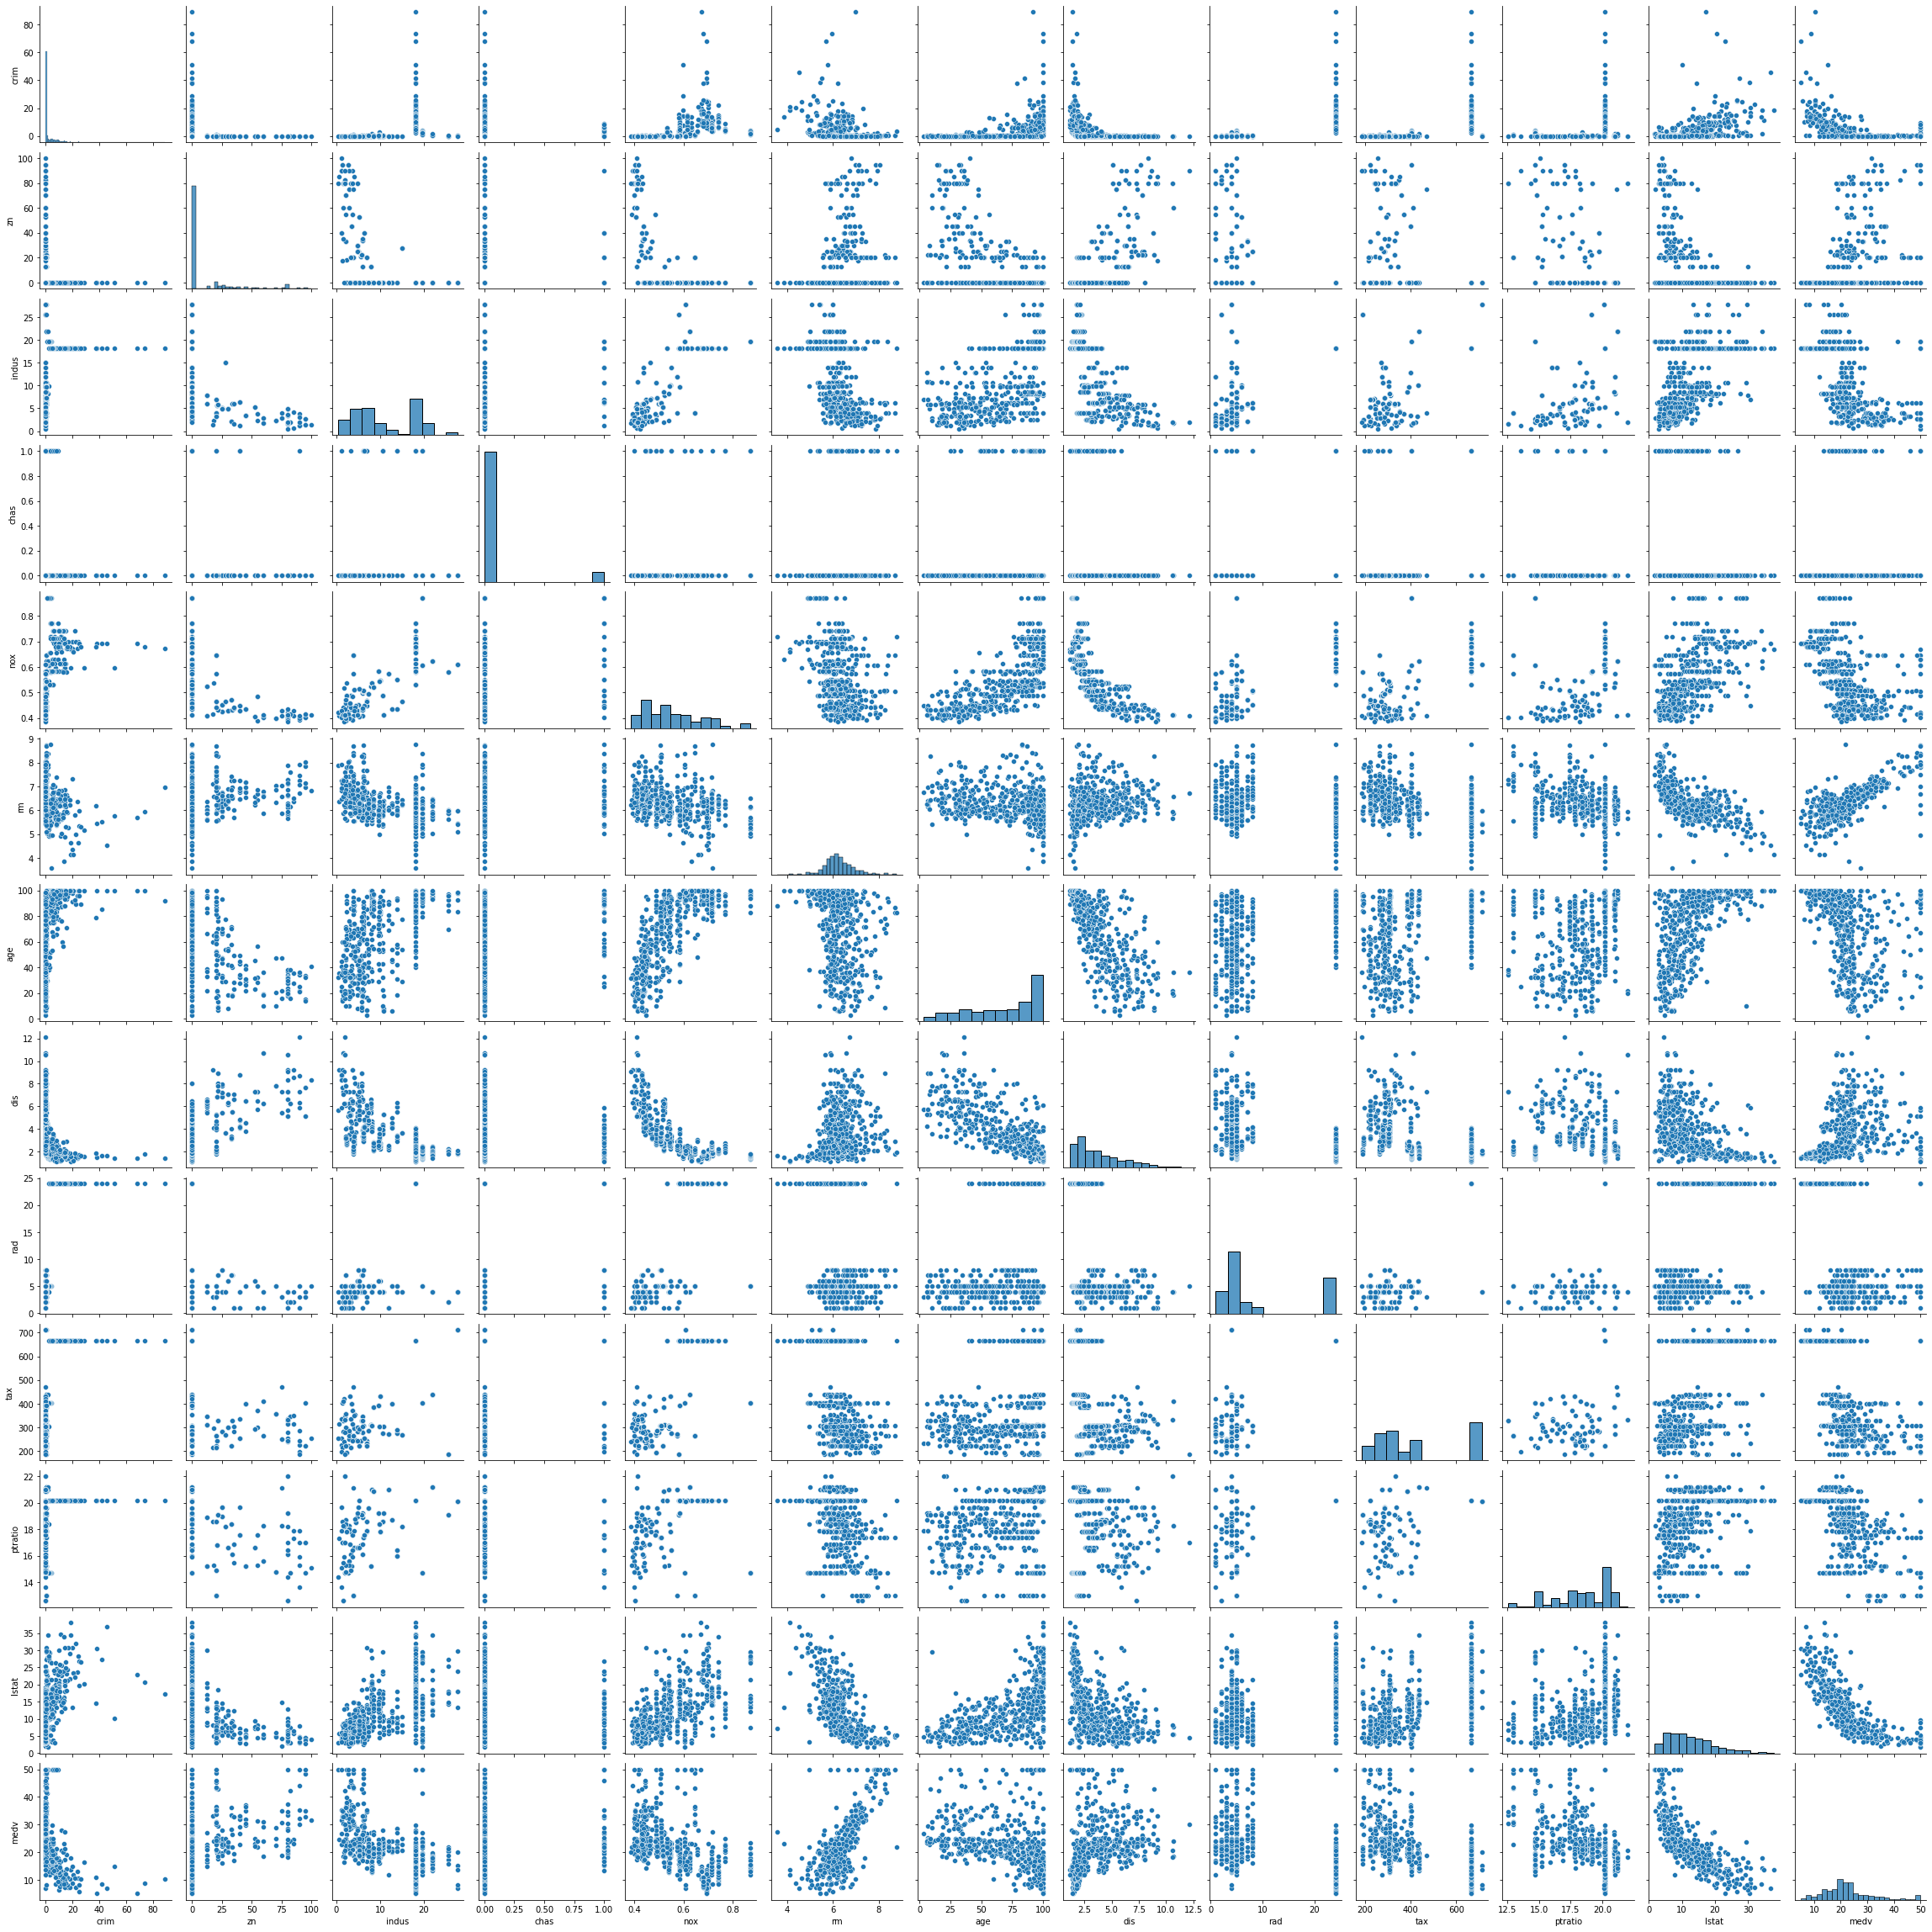

In [5]:
sns.pairplot(data_df)

In [5]:
y = data_df["medv"]
X = data_df.drop("medv", axis=1)
X.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  
0   4.98  
1   9.14  
2   4.03  
3   2.94  
4   5.33

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
 )

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

In [9]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Train MSE = {round(mse_train, 3)}")
print(f"Test MSE = {round(mse_test, 3)}")

Train MSE = 22.604
Test MSE = 22.778


In [10]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(f"Train R^2 = {round(r2_train, 3)}")
print(f"Test R^2 = {round(r2_test, 3)}")

Train R^2 = 0.74
Test R^2 = 0.689


In [11]:
lin_reg.coef_

array([-1.27195928e-01,  3.07954889e-02,  2.52477064e-02,  3.04947682e+00,
       -1.81832461e+01,  4.24009781e+00, -3.59439826e-03, -1.46550703e+00,
        2.39990397e-01, -1.12752436e-02, -8.94844726e-01, -5.37770202e-01])

#### Using `statsmodels`

In [12]:
X_train_sm = sm.add_constant(X_train)
mod = sm.OLS(y_train, X_train_sm)
res = mod.fit()

In [13]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     92.64
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          2.82e-106
Time:                        17:33:53   Log-Likelihood:                -1203.1
No. Observations:                 404   AIC:                             2432.
Df Residuals:                     391   BIC:                             2484.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9705      5.555      6.655      0.0

### Ridge Regression

In [25]:
ridge = Ridge()

param_dist = {
     'alpha': loguniform(1e-9, 1e9)
}
ridge_search = RandomizedSearchCV(ridge,
                              scoring="r2",
                              param_distributions=param_dist,
                              cv=5,
                              n_iter=1000,
                              random_state=42)

In [26]:
%%time
ridge_search.fit(X_train, y_train)

CPU times: total: 9.95 s
Wall time: 28.9 s


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=1000,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B00F137070>},
                   random_state=42, scoring='r2')

In [27]:
ridge_search.best_params_

{'alpha': 1.2116478446097116e-09}

In [43]:
ridge = ridge_search.best_estimator_

In [22]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [23]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Train MSE = {round(mse_train, 3)}")
print(f"Test MSE = {round(mse_test, 3)}")

Train MSE = 22.604
Test MSE = 22.778


In [24]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(f"Train R^2 = {round(r2_train, 3)}")
print(f"Test R^2 = {round(r2_test, 3)}")

Train R^2 = 0.74
Test R^2 = 0.689


In [46]:
print(ridge.coef_)
print(lin_reg.coef_)

[-1.27195928e-01  3.07954889e-02  2.52477063e-02  3.04947682e+00
 -1.81832461e+01  4.24009781e+00 -3.59439828e-03 -1.46550703e+00
  2.39990397e-01 -1.12752436e-02 -8.94844726e-01 -5.37770203e-01]
[-1.27195928e-01  3.07954889e-02  2.52477064e-02  3.04947682e+00
 -1.81832461e+01  4.24009781e+00 -3.59439826e-03 -1.46550703e+00
  2.39990397e-01 -1.12752436e-02 -8.94844726e-01 -5.37770202e-01]


### LASSO

In [19]:
lasso = Lasso()

param_dist = {
     'alpha': loguniform(1e-9, 1e9)
}
lasso_search = RandomizedSearchCV(lasso,
                              scoring="r2",
                              param_distributions=param_dist,
                              cv=5,
                              n_iter=1000,
                              random_state=12)

In [20]:
%%time
lasso_search.fit(X_train, y_train)

CPU times: total: 11 s
Wall time: 28.8 s


RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=1000,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DBC356E640>},
                   random_state=12, scoring='r2')

In [21]:
lasso_search.best_params_

{'alpha': 1.0185987301073878e-09}

In [22]:
lasso = lasso_search.best_estimator_

In [23]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [24]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Train MSE = {round(mse_train, 3)}")
print(f"Test MSE = {round(mse_test, 3)}")

Train MSE = 22.604
Test MSE = 22.778


In [25]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(f"Train R^2 = {round(r2_train, 3)}")
print(f"Test R^2 = {round(r2_test, 3)}")

Train R^2 = 0.74
Test R^2 = 0.689


In [27]:
print(lasso.coef_)
print(lin_reg.coef_)

[-1.27195928e-01  3.07954890e-02  2.52477049e-02  3.04947680e+00
 -1.81832458e+01  4.24009781e+00 -3.59439848e-03 -1.46550703e+00
  2.39990397e-01 -1.12752436e-02 -8.94844722e-01 -5.37770203e-01]
[-1.27195928e-01  3.07954889e-02  2.52477064e-02  3.04947682e+00
 -1.81832461e+01  4.24009781e+00 -3.59439826e-03 -1.46550703e+00
  2.39990397e-01 -1.12752436e-02 -8.94844726e-01 -5.37770202e-01]


### Qualitative predictors with the Carseat dataset

In [28]:
data_df = pd.read_csv("https://raw.githubusercontent.com/LukeMoraglia/ISLR_datasets/master/data/Carseats.csv")

In [31]:
data_df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [37]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


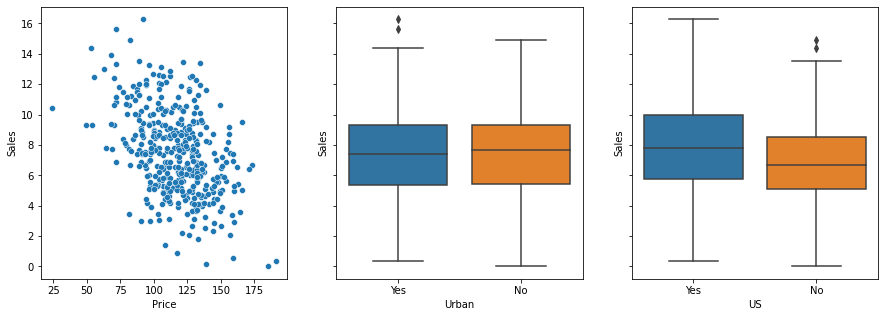

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.scatterplot(ax=axes[0], x="Price", y="Sales", data=data_df)
sns.boxplot(ax = axes[1], x="Urban", y="Sales", data=data_df)
sns.boxplot(ax = axes[2], x="US", y="Sales", data=data_df)
plt.show()

In [39]:
X = data_df[['Price', 'Urban', 'US']]
X = pd.get_dummies(X, drop_first=True)
X.head()

Price  Urban_Yes  US_Yes
0    120          1       1
1     83          1       1
2     80          1       1
3     97          1       1
4    128          1       0

In [40]:
y = data_df['Sales']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
 )

In [48]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

In [50]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Train MSE = {round(mse_train, 3)}")
print(f"Test MSE = {round(mse_test, 3)}")

Train MSE = 5.636
Test MSE = 7.775


In [51]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(f"Train R^2 = {round(r2_train, 3)}")
print(f"Test R^2 = {round(r2_test, 3)}")

Train R^2 = 0.24
Test R^2 = 0.214


In [52]:
lin_reg.coef_

array([-0.05280768, -0.1090445 ,  1.09779658])

#### Using `statsmodels`

In [53]:
X_train_sm = sm.add_constant(X_train)
mod = sm.OLS(y_train, X_train_sm)
res = mod.fit()

In [54]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     33.19
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.12e-18
Time:                        17:24:46   Log-Likelihood:                -730.73
No. Observations:                 320   AIC:                             1469.
Df Residuals:                     316   BIC:                             1485.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9002      0.706     18.268      0.0